Document Similarity using Vector Databases Tasks:

Collect a dataset of at least 10 text documents of your choice (e.g. news articles, movie reviews, scientific papers).

Choose a vectorization technique such as TF-IDF, Doc2Vec, or BERT to convert each document into a numerical vector representation.

Create a vector database by storing the vectors of all the documents in a data structure such as a matrix or a database table.

Choose a similarity measure to calculate the similarity between two documents.

Implement a document similarity function that takes two documents as input and returns the similarity score using the chosen similarity measure.

Test your document similarity function by comparing pairs of documents and interpreting the results.

Evaluate the performance of your model using at least one metric such as precision, recall, F1 score, or Mean Average Precision (MAP).

Write a report summarizing your approach, results, and findings.

#**1)Importing libraries**

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
pd.set_option("display.max_colwidth", 200)
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, BatchNormalization, Dropout, Embedding, LayerNormalization, Bidirectional
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
## text preprocessing modules
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Word2Vec
import re
import nltk
nltk.download('punkt')
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
data=pd.read_csv("/content/Imdb_preprocessed (1).csv.gz",encoding='utf-8')

In [3]:
data2 = pd.DataFrame()
data2['Text'] = data['cleaned_reviews_with_SW2']
data2['Category'] = data['sentiment']
data2.head()

,Text,Category
0,reviewer mentioned watching hooked right exactly happened thing struck brutality unflinching violence right word trust faint hearted timid pull punch regard drug sex violence hardcore use word cal...,positive
1,wonderful little filming technique unassuming oldtimebbc fashion give comforting discomforting sense realism entire piece actor extremely chosen michael sheen got polari voice pat truly seamless g...,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned watching lighthearted simplistic witty likable bread suspected serial killer disappointed realize match point risk addic...,positive
3,basically little boy jake think zombie closet parent fighting time slower soap opera suddenly jake decides rambo kill zombie going make decide parent divorcing arguing like real life jake closet t...,negative
4,petter matteis love time visually stunning mattei offer vivid portrait human relation telling power people different situation encounter variation arthur schnitzlers play theme transfer present ti...,positive


#**2)Feature extration using doc2vec model**

In [4]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(data2.Text, data2.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [5]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(10):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 50000/50000 [00:00<00:00, 2728109.06it/s]


This code snippet is training a Doc2Vec model using the DBOW (Distributed Bag of Words) algorithm, which is specified by the parameter dm=0.










##a)Doc2vec vectors
**Storing the vectors of all the documents in a data structure such as a matrix or a database table.**

In [6]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

<ipython-input-6-1eeab83ba0c8>:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors[i] = model.docvecs[prefix]


In [7]:
print(train_vectors_dbow)
print(test_vectors_dbow)

[[-0.00236387  0.31243899  0.08381262 ... -0.75983202 -0.14935724
   0.05299604]
 [ 0.96097285 -0.34891421  0.2245619  ... -0.13485844  0.62959927
   0.31671286]
 [ 0.50727898 -0.00242367  0.37471396 ...  0.04969041  0.05152684
   0.40583614]
 ...
 [ 0.39774364 -0.38610804  0.14258409 ...  0.19316669 -0.51253074
   0.41501114]
 [ 0.54100817 -0.26505101  0.2338903  ... -0.25286719  0.49605942
   0.48351836]
 [-0.41451922 -0.22017194  0.91013288 ... -1.32581699 -0.11304305
   0.61991882]]
[[ 0.1081235  -0.0929754   0.37890899 ...  0.2410364  -0.22265331
   0.09518757]
 [ 0.09030019  0.12989843  0.39698055 ... -0.47079659  0.08514927
   0.15973622]
 [-0.01934803  0.0317518  -0.1629006  ... -0.31297004 -0.06903721
  -0.04305061]
 ...
 [-0.27251512 -0.50230724  0.09074987 ...  0.03952739 -0.10158814
   0.28686747]
 [ 0.48353255 -0.33508298  0.23889378 ... -0.15662709 -0.21384583
   0.20516849]
 [ 0.31081313  0.38438755 -0.082015   ... -0.25133684  0.31312037
   0.01873228]]


In [8]:
train_df = pd.DataFrame(train_vectors_dbow, columns=['d{}'.format(i) for i in range(300)])
train_df['category'] = y_train.values
train_df.head()


,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d291,d292,d293,d294,d295,d296,d297,d298,d299,category
0,-0.002364,0.312439,0.083813,0.085445,0.597308,-0.097942,0.843401,-0.341329,-0.330299,-0.377469,...,0.207252,-0.305104,-0.203324,-0.604867,0.315738,-0.531247,-0.759832,-0.149357,0.052996,positive
1,0.960973,-0.348914,0.224562,0.263836,0.246896,0.505473,0.048165,0.186518,-0.377521,0.028435,...,-0.430247,0.150613,-0.653088,-0.261608,-0.943375,-0.410421,-0.134858,0.629599,0.316713,negative
2,0.507279,-0.002424,0.374714,-0.239163,0.032721,-0.122167,0.004666,-0.003523,0.184754,-0.371527,...,0.719875,0.117074,0.364264,-0.075046,-0.496375,-0.061845,0.049690,0.051527,0.405836,positive
3,-0.051032,-0.178564,0.453076,-0.122837,0.730774,-0.300664,0.430641,-0.479927,-0.281612,-1.252723,...,0.260974,0.511784,0.165415,-0.113108,-0.272383,-0.333871,-0.295558,-0.399999,-0.160062,positive
4,0.396603,-0.305708,0.389072,0.034102,-0.001674,0.320661,0.468932,-0.182763,0.510928,-0.623021,...,0.278885,0.198312,0.079977,0.141112,-0.399636,-0.931333,-0.630839,0.140066,-0.027744,positive


In [9]:
test_df = pd.DataFrame(test_vectors_dbow, columns=['d{}'.format(i) for i in range(300)])
test_df['category'] = y_test.values
test_df.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d291,d292,d293,d294,d295,d296,d297,d298,d299,category
0,0.108124,-0.092975,0.378909,0.414349,-0.013419,0.246837,-0.040114,-0.008955,-0.121534,-0.610390,...,0.059487,0.324034,0.080094,-0.595304,0.325819,-0.055487,0.241036,-0.222653,0.095188,positive
1,0.090300,0.129898,0.396981,-0.267047,0.294891,0.522061,-0.218007,0.263001,-0.404689,-1.153633,...,-0.208702,0.156947,-0.250764,-0.414290,0.011243,0.245646,-0.470797,0.085149,0.159736,negative
2,-0.019348,0.031752,-0.162901,-0.663228,0.310369,0.644314,0.322041,-0.047297,-0.195381,-0.087679,...,0.604374,-0.260711,-0.303561,0.061852,-0.185873,-0.542933,-0.312970,-0.069037,-0.043051,negative
3,0.000741,-0.593643,0.285589,0.251480,0.184075,-0.236720,0.556642,-0.333567,-0.267293,-0.704638,...,0.339862,0.204726,0.387498,0.056272,-0.266156,-0.246427,-0.393628,0.042864,0.526947,positive
4,0.229196,0.289348,0.466716,0.075919,0.096265,0.270633,0.595969,-0.418690,-0.241255,-0.534277,...,-0.214184,0.250558,-0.096391,-0.047149,0.132478,-0.070852,-0.603367,-0.134467,0.105156,positive


##**b)Doc2vev similairity dataframe for train and test**

**Simalirty between documents**

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(train_vectors_dbow, test_vectors_dbow)

# Create a DataFrame to display the results
doc_names_train = ['Train Doc {}'.format(i) for i in range(len(X_train))]
doc_names_test = ['Test Doc {}'.format(i) for i in range(len(X_test))]
similarity_df_doc2vec = pd.DataFrame(cosine_sim, index=doc_names_train, columns=doc_names_test)


In [11]:
similarity_df_doc2vec

,Test Doc 0,Test Doc 1,Test Doc 2,Test Doc 3,Test Doc 4,Test Doc 5,Test Doc 6,Test Doc 7,Test Doc 8,Test Doc 9,...,Test Doc 14990,Test Doc 14991,Test Doc 14992,Test Doc 14993,Test Doc 14994,Test Doc 14995,Test Doc 14996,Test Doc 14997,Test Doc 14998,Test Doc 14999
Train Doc 0,0.201888,0.147888,0.149036,0.158942,0.074226,0.146834,0.202029,0.107473,0.200576,0.100441,...,0.107475,0.079056,0.063693,0.160442,0.058546,0.133073,0.198569,0.132377,0.117368,0.139495
Train Doc 1,0.212353,0.174876,0.081997,0.077217,0.239360,0.055156,0.143296,0.148838,0.114897,0.204172,...,0.071435,0.217732,0.106693,0.068531,-0.008585,0.233028,0.182882,0.025580,0.184773,0.210690
Train Doc 2,0.151933,0.113071,0.099702,0.109047,0.131200,-0.000310,0.117067,0.172344,0.093042,0.065080,...,0.202238,0.160646,0.266929,0.088601,0.254413,0.178272,0.057976,0.140065,0.248389,0.153303
Train Doc 3,0.122185,0.139078,0.193493,0.160260,0.247287,0.123050,0.104447,0.027899,0.122496,0.216612,...,0.054702,0.173454,0.181561,0.100546,0.208239,0.096095,0.095260,0.121010,0.127356,0.124388
Train Doc 4,0.119123,0.056801,0.158858,0.187285,0.194438,0.206351,0.177984,0.125434,0.001890,0.157393,...,0.123491,0.202865,0.154290,0.120300,0.069648,0.088366,0.181430,0.283184,0.183463,0.138103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train Doc 34995,0.074060,0.155888,0.145719,0.215706,0.192998,0.296082,0.117311,0.074659,0.234784,0.111351,...,0.195684,0.110321,0.181718,0.086742,0.218821,0.172276,0.050801,0.252868,0.230558,0.185092
Train Doc 34996,0.151310,0.149148,0.172569,0.139586,0.141406,0.120958,0.125477,0.091460,0.087394,0.177377,...,0.189333,0.160103,0.090874,0.146671,0.090875,0.187026,0.107823,0.168924,0.174179,0.149348
Train Doc 34997,0.177013,0.179969,0.050751,0.162762,0.092042,0.168811,0.244415,0.123139,0.159535,0.031087,...,0.111706,0.173190,0.104151,0.191889,0.105181,0.185825,0.018473,0.142919,0.227669,0.116290
Train Doc 34998,0.076087,0.134881,0.187583,0.112339,0.242624,0.129549,0.040475,0.034700,0.132672,0.205822,...,0.180492,0.092881,0.173593,0.099729,0.096843,0.122019,0.208153,0.204221,0.180128,0.160043


##c)**Cosine similairty for a given corpus**

In [12]:
corpus=["This movie is an absolute masterpiece. The story, the acting, and the cinematography all come together to create a truly unforgettable experience.",
"I was blown away by this film. The performances were outstanding, and the plot kept me on the edge of my seat the entire time.",
"This is one of the best movies I have ever seen. The characters were so well-developed, and the emotional payoff at the end was incredible.",
"What a fantastic film! The writing was sharp, the direction was flawless, and the performances were top-notch.",
"I can't recommend this movie enough. It had everything: action, drama, humor, and heart. I was thoroughly entertained from start to finish.",
"This movie is a true work of art. The visuals are stunning, the story is gripping, and the performances are outstanding.",
"I was moved to tears by this film. It's rare to find a movie that can be both heartwarming and heartbreaking, but this one pulled it off with aplomb.",
"I was thoroughly impressed by this movie. The pacing was perfect, the characters were fully-realized, and the ending left me feeling satisfied.",
"This is a movie that will stick with me for a long time. The themes were powerful, the performances were outstanding, and the direction was masterful.",
"If you only see one movie this year, make it this one. It's a tour-de-force of filmmaking, and a must see for any fan of cinema.,",
"I can't believe how bad this film was. The characters were one-dimensional, the dialogue was cringe-worthy, and the story made no sense.",
"I was really disappointed by this movie. The trailers made it look so promising, but the final product was a mess.",
"Save your money and skip this one. The writing was terrible, the pacing was off, and the whole thing felt like a cheap knockoff of better films.",
"This movie was a chore to sit through. The performances were lackluster, the direction was pedestrian, and the story was dull.",
"I was really hoping to like this film, but it just didn't deliver. The script was weak, the characters were forgettable, and the whole thing felt like a missed opportunity.",
"This movie had no redeeming qualities. The acting was terrible, the story was nonsensical, and the special effects were laughable.",
"I regret spending money on this movie. It was poorly made, poorly acted, and just plain boring.",
"I couldn't wait for this movie to be over. The pacing was slow, the dialogue was stilted, and the whole thing was just plain dull.",
"This movie was a complete mess. The story was convoluted, the acting was wooden, and the direction was unfocused."]

In [13]:
# Get most similar document for each document
most_similar = {}
for i, doc in enumerate(corpus):
    sim_scores = list(cosine_sim[i])
    sim_scores[i] = 0  # Set similarity score to 0 for the document itself
    most_similar_idx = sim_scores.index(max(sim_scores))
    most_similar[doc_names_train[i]] = doc_names_train[most_similar_idx]

# Display most similar document for each document
for doc, most_similar_doc in most_similar.items():
    print(f"{doc} is most similar to {most_similar_doc}")

Train Doc 0 is most similar to Train Doc 3345
Train Doc 1 is most similar to Train Doc 14920
Train Doc 2 is most similar to Train Doc 724
Train Doc 3 is most similar to Train Doc 13631
Train Doc 4 is most similar to Train Doc 13817
Train Doc 5 is most similar to Train Doc 13604
Train Doc 6 is most similar to Train Doc 5727
Train Doc 7 is most similar to Train Doc 14168
Train Doc 8 is most similar to Train Doc 6198
Train Doc 9 is most similar to Train Doc 68
Train Doc 10 is most similar to Train Doc 6399
Train Doc 11 is most similar to Train Doc 4764
Train Doc 12 is most similar to Train Doc 13472
Train Doc 13 is most similar to Train Doc 11645
Train Doc 14 is most similar to Train Doc 427
Train Doc 15 is most similar to Train Doc 1117
Train Doc 16 is most similar to Train Doc 8697
Train Doc 17 is most similar to Train Doc 14573
Train Doc 18 is most similar to Train Doc 6314


#3)Model building

In [14]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [15]:
#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Test_Accuracy','Test_Recall'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,
                                            test_accuracy,test_recall],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

##**3.a)LogisticRegression**

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(train_vectors_dbow, y_train)
y_pred_train =LR.predict(train_vectors_dbow)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = LR.predict(test_vectors_dbow)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores)
scores

trainaccuracy 0.8725714285714286
testaccuracy 0.868

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8731    0.8712    0.8721     17460
    positive     0.8721    0.8739    0.8730     17540

    accuracy                         0.8726     35000
   macro avg     0.8726    0.8726    0.8726     35000
weighted avg     0.8726    0.8726    0.8726     35000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8704    0.8664    0.8684      7540
    positive     0.8656    0.8696    0.8676      7460

    accuracy                         0.8680     15000
   macro avg     0.8680    0.8680    0.8680     15000
we

<ipython-input-15-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.872571,0.872568,0.868,0.868008


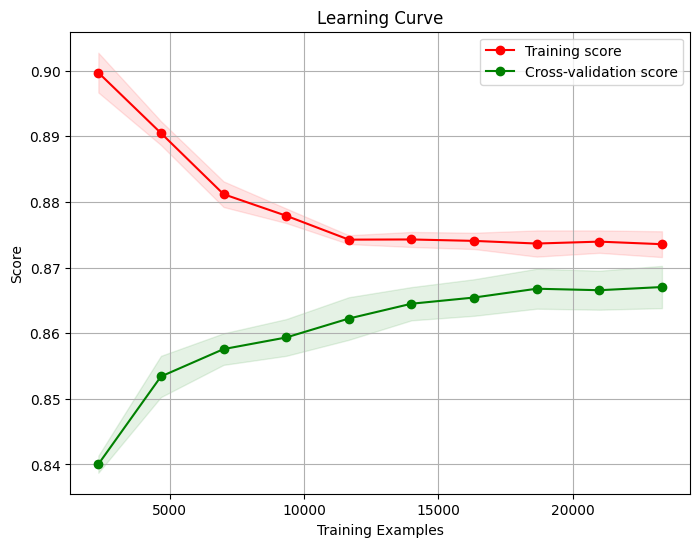

In [17]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LR, train_vectors_dbow, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##**3.b)GaussianNB**

In [18]:
NB =  GaussianNB()
NB.fit(train_vectors_dbow, y_train)
y_pred_train =NB.predict(train_vectors_dbow)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = NB.predict(test_vectors_dbow)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GaussianNB",scores)
scores

trainaccuracy 0.8482857142857143
testaccuracy 0.8478666666666667

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8478    0.8482    0.8480     17460
    positive     0.8488    0.8484    0.8486     17540

    accuracy                         0.8483     35000
   macro avg     0.8483    0.8483    0.8483     35000
weighted avg     0.8483    0.8483    0.8483     35000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8501    0.8467    0.8484      7540
    positive     0.8457    0.8491    0.8474      7460

    accuracy                         0.8479     15000
   macro avg     0.8479    0.8479    0.8479

<ipython-input-15-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.872571,0.872568,0.868000,0.868008
1,GaussianNB,0.848286,0.848285,0.847867,0.847873


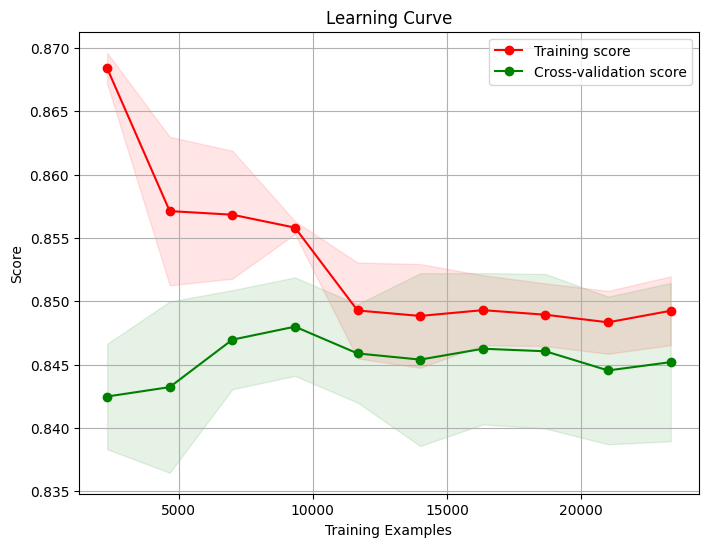

In [19]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(NB, train_vectors_dbow, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##**3.c)LogisticRegression-2**

In [20]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(n_jobs=1, C=1e5)
LR2.fit(train_vectors_dbow, y_train)
y_pred_train =LR2.predict(train_vectors_dbow)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = LR2.predict(test_vectors_dbow)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression-2",scores)
scores

trainaccuracy 0.8726571428571429
testaccuracy 0.8680666666666667

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8731    0.8714    0.8722     17460
    positive     0.8722    0.8739    0.8731     17540

    accuracy                         0.8727     35000
   macro avg     0.8727    0.8727    0.8727     35000
weighted avg     0.8727    0.8727    0.8727     35000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8706    0.8663    0.8684      7540
    positive     0.8655    0.8698    0.8677      7460

    accuracy                         0.8681     15000
   macro avg     0.8681    0.8681    0.8681

<ipython-input-15-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.872571,0.872568,0.868000,0.868008
1,GaussianNB,0.848286,0.848285,0.847867,0.847873
2,LogisticRegression-2,0.872657,0.872654,0.868067,0.868076


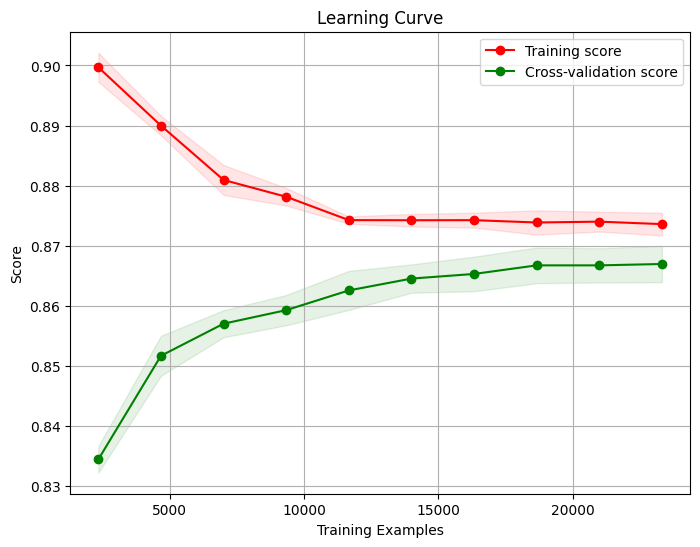

In [21]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LR2, train_vectors_dbow, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

##**3.d)KNeighborsClassifier**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(train_vectors_dbow, y_train)
y_pred_train =KNN.predict(train_vectors_dbow)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = KNN.predict(test_vectors_dbow)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNN",scores)
scores

trainaccuracy 0.8417142857142857
testaccuracy 0.7264666666666667

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8546    0.8227    0.8383     17460
    positive     0.8298    0.8607    0.8450     17540

    accuracy                         0.8417     35000
   macro avg     0.8422    0.8417    0.8416     35000
weighted avg     0.8422    0.8417    0.8417     35000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.7422    0.6984    0.7196      7540
    positive     0.7123    0.7548    0.7330      7460

    accuracy                         0.7265     15000
   macro avg     0.7273    0.7266    0.7263

<ipython-input-15-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.872571,0.872568,0.868000,0.868008
1,GaussianNB,0.848286,0.848285,0.847867,0.847873
2,LogisticRegression-2,0.872657,0.872654,0.868067,0.868076
3,KNN,0.841714,0.841671,0.726467,0.726617


**Logistic regression had perfomed far better than other models,having all the paramters in balance,there is less gap between the learning curve.This is a good generalized model can be used for sentiment analysis of movie reveiws but still for trail purpose lets also check How lstm also works.**

#**4)Implementation of LSTM**

In [52]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y_test= label_encoder.fit_transform(y_test) 
y_train= label_encoder.fit_transform(y_train) 

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(train_vectors_dbow.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the Doc2Vec vectors to fit the input shape of the RNN
train_vectors_dbow = train_vectors_dbow.reshape(train_vectors_dbow.shape[0], train_vectors_dbow.shape[1], 1)
test_vectors_dbow = test_vectors_dbow.reshape(test_vectors_dbow.shape[0], test_vectors_dbow.shape[1], 1)

# Train the model
model.fit(train_vectors_dbow, y_train, epochs=3, batch_size=32, validation_data=(test_vectors_dbow, y_test))


Epoch 1/3
1094/1094 [==============================] - 482s 438ms/step - loss: 0.6892 - accuracy: 0.5417 - val_loss: 0.6867 - val_accuracy: 0.5499
Epoch 2/3
1094/1094 [==============================] - 480s 439ms/step - loss: 0.6865 - accuracy: 0.5484 - val_loss: 0.6871 - val_accuracy: 0.5480
Epoch 3/3
1094/1094 [==============================] - 481s 439ms/step - loss: 0.6860 - accuracy: 0.5535 - val_loss: 0.6839 - val_accuracy: 0.5570


In [60]:
# Get the predicted class probabilities for the train and test data
y_pred_train_prob = model.predict(train_vectors_dbow)
y_pred_test_prob = model.predict(test_vectors_dbow)

# Get the predicted classes by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
# Print the accuracy scores for the training and test data
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

# Print the classification report for the training and test data
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

469/469 [==============================] - 63s 135ms/step
Train Accuracy: 0.49885714285714283
Test Accuracy: 0.5026666666666667

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.4989    1.0000    0.6657     17460
           1     0.0000    0.0000    0.0000     17540

    accuracy                         0.4989     35000
   macro avg     0.2494    0.5000    0.3328     35000
weighted avg     0.2489    0.4989    0.3321     35000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5027    1.0000    0.6690      7540
           1     0.0000    0.0000    0.0000      7460

    accuracy                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Adding more layers would certainly help us getting better results but due to time constraint we will stick with our previous ml models and use them for this purpose.**